In [53]:
# Libraries needed for the project

import pandas as pd
import requests
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
%matplotlib inline

## Business Use case: Get the data from real-time business and help them to gain more profit and analyze that how the pandemic has afftected their business. 

### Load data and reformat

In [103]:
df = pd.read_csv("C:/Users/jranj/OneDrive/Documents/GitHub/personal01/Food Truck/itemsall.csv")

In [111]:
import pandas as pd
url = 'https://github.com/JRMohapatra/personal01/blob/main/Food%20Truck/itemsall.csv?raw=true'
df = pd.read_csv(url)
#df = pd.read_csv(url)

print(df.head(5))

         Date      Time                   Time Zone Category           Item  \
0  12/23/2018  12:48:53  Eastern Time (US & Canada)     None  Custom Amount   
1  12/22/2018  11:46:37  Eastern Time (US & Canada)     None  Custom Amount   
2  12/22/2018  11:36:57  Eastern Time (US & Canada)     None   Jerk Chicken   
3  12/22/2018  11:36:57  Eastern Time (US & Canada)     None  Custom Amount   
4  12/22/2018  11:36:57  Eastern Time (US & Canada)     None  Custom Amount   

   Qty Price Point Name  SKU  Modifiers Applied Gross Sales  ...  \
0    1              NaN  NaN                NaN     $21.00   ...   
1    1              NaN  NaN                NaN     $17.50   ...   
2    1          Regular  NaN                NaN      $6.50   ...   
3    1              NaN  NaN                NaN      $5.00   ...   
4    1              NaN  NaN                NaN      $3.00   ...   

                 Payment ID Device Name  \
0  m2FJSBRQ0mPm0TecGiU14vMF         NaN   
1  KN2WHnDz4BveHDz6wZPN0sMF   

In [112]:
df.head()

,Date,Time,Time Zone,Category,Item,Qty,Price Point Name,SKU,Modifiers Applied,Gross Sales,...,Payment ID,Device Name,Notes,Event Type,Location,Dining Option,Customer ID,Customer Reference ID,Unit,Count
0,12/23/2018,12:48:53,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,$21.00,...,m2FJSBRQ0mPm0TecGiU14vMF,NaN,NaN,Payment,Authentic by Zee,NaN,ET95G97MHS02PYQGZCJWEYVM8W,NaN,ea,1
1,12/22/2018,11:46:37,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,$17.50,...,KN2WHnDz4BveHDz6wZPN0sMF,NaN,NaN,Payment,Authentic by Zee,NaN,9FY2KQCGFX3E7A6SR5D0YPWCSM,NaN,ea,1
2,12/22/2018,11:36:57,Eastern Time (US & Canada),None,Jerk Chicken,1,Regular,NaN,NaN,$6.50,...,iiRKKBeCaZgepOFmw3OTGxMF,NaN,Juicy Grilled Leg Quarters steamed down in the...,Payment,Authentic by Zee,NaN,J4X9N1NKMN3CCZA27TV71PP1GM,NaN,ea,1
3,12/22/2018,11:36:57,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,$5.00,...,iiRKKBeCaZgepOFmw3OTGxMF,NaN,NaN,Payment,Authentic by Zee,NaN,J4X9N1NKMN3CCZA27TV71PP1GM,NaN,ea,1
4,12/22/2018,11:36:57,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,$3.00,...,iiRKKBeCaZgepOFmw3OTGxMF,NaN,NaN,Payment,Authentic by Zee,NaN,J4X9N1NKMN3CCZA27TV71PP1GM,NaN,ea,1


In [113]:
df.Date = pd.to_datetime(df.Date)

In [114]:
df["Gross Sales"] = df["Gross Sales"].str.replace(r'[^0-9\.]','',regex=True)
df["Gross Sales"] = pd.to_numeric(df["Gross Sales"])

### Create new column to find day and month from transaction date

In [115]:
df["day_of_week"] = df.Date.dt.day_name()

In [116]:
df["month"] = df.Date.dt.month_name()

In [117]:
df["month_index"] = df.Date.dt.month

<AxesSubplot:>

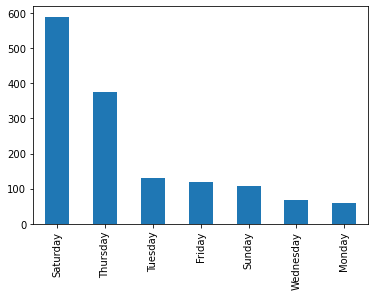

In [118]:
pd.value_counts(df.day_of_week,dropna=False).plot(kind='bar')

### From the above bar plot we can see that most of the transactions are made on Saturday and Thursday. Below is the pie chart of the same data.

C:\Users\jranj\.conda\envs\py3.8\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='day_of_week'>

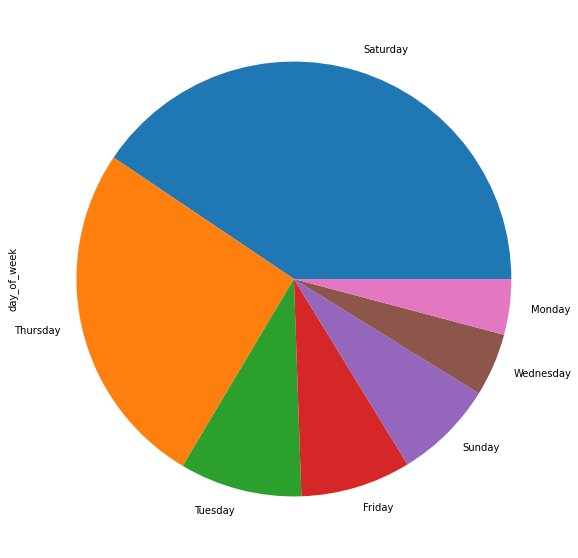

In [119]:
pd.value_counts(df.day_of_week,normalize=True,dropna=False).plot(kind='pie',figsize=(10,10))

### Now lets analyse the monthly transactions to see the seasonality of food business

In [120]:
sales_data = df.groupby(['month',"month_index"]).agg({"Gross Sales":sum,"Qty":sum}).reset_index().sort_values(by='month_index')

### The bar plot below represents the gross sales in terms of amount for each calendar month

<AxesSubplot:xlabel='month', ylabel='Gross Sales'>

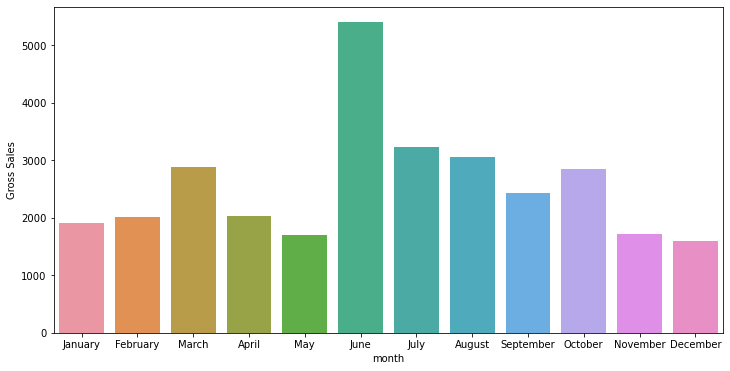

In [121]:
fig_size = (12,6)
fig,ax = plt.subplots(figsize=fig_size)
sns.barplot(x='month',y="Gross Sales",data=sales_data,ax=ax)

### The bar plot below represents the gross sales in terms of food quantity for each calendar month

<AxesSubplot:xlabel='month', ylabel='Qty'>

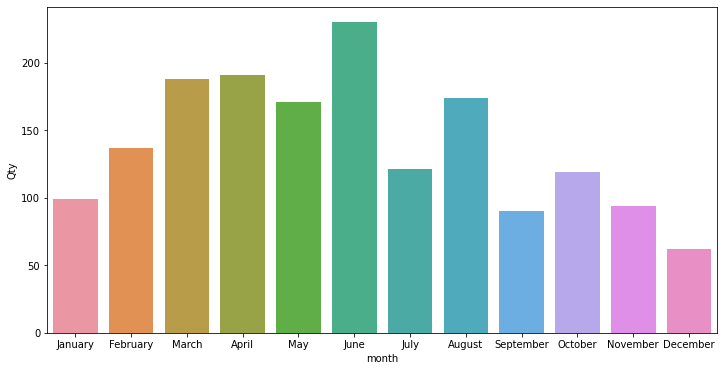

In [122]:
fig_size = (12,6)
fig,ax = plt.subplots(figsize=fig_size)
sns.barplot(x='month',y="Qty",data=sales_data,ax=ax)

In [123]:
df.columns

Index(['Date', 'Time', 'Time Zone', 'Category', 'Item', 'Qty',
       'Price Point Name', 'SKU', 'Modifiers Applied', 'Gross Sales',
       'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Payment ID',
       'Device Name', 'Notes', 'Event Type', 'Location', 'Dining Option',
       'Customer ID', 'Customer Reference ID', 'Unit', 'Count', 'day_of_week',
       'month', 'month_index'],
      dtype='object')

### Lets analyse items sold

In [124]:
day_vs_item = df.groupby(["day_of_week"])["Item"].apply(list).reset_index()

In [125]:
df.Item.value_counts()[df.Item.value_counts() > 25].index.tolist()

['Custom Amount',
 'Jerk Chicken',
 'Chicken Fajitas',
 'BBQ Chicken',
 'Curry chicken',
 'Short Ribs',
 'Wings',
 'Oxtail']

In [126]:
subset = df[df.Item.isin([
 'Jerk Chicken',
 'Chicken Fajitas',
 'BBQ Chicken',
 'Curry chicken',
 'Short Ribs',
 'Wings',
 'Oxtail'])]

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

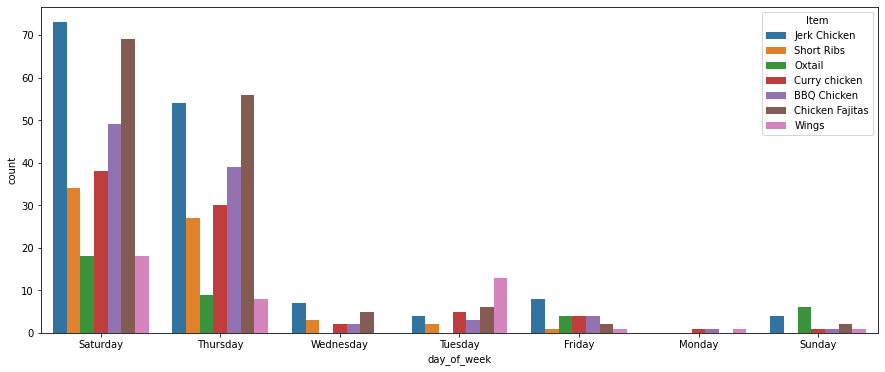

In [127]:
fig_size = (15,6)
fig,ax = plt.subplots(figsize=fig_size)
sns.countplot(x="day_of_week",hue="Item",data=subset,ax=ax)

<AxesSubplot:xlabel='month', ylabel='count'>

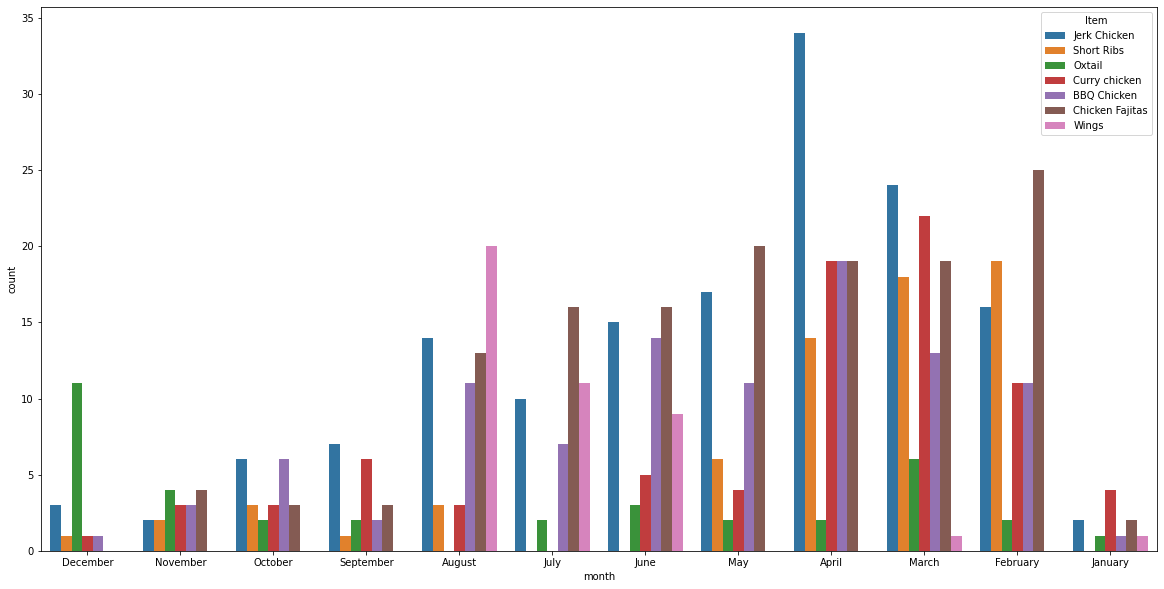

In [128]:
fig_size = (20,10)
fig,ax = plt.subplots(figsize=fig_size)
sns.countplot(x="month",hue="Item",data=subset,ax=ax)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[Text(0, 0.5, 'Relative Frequency'), Text(0.5, 0, 'Month')]

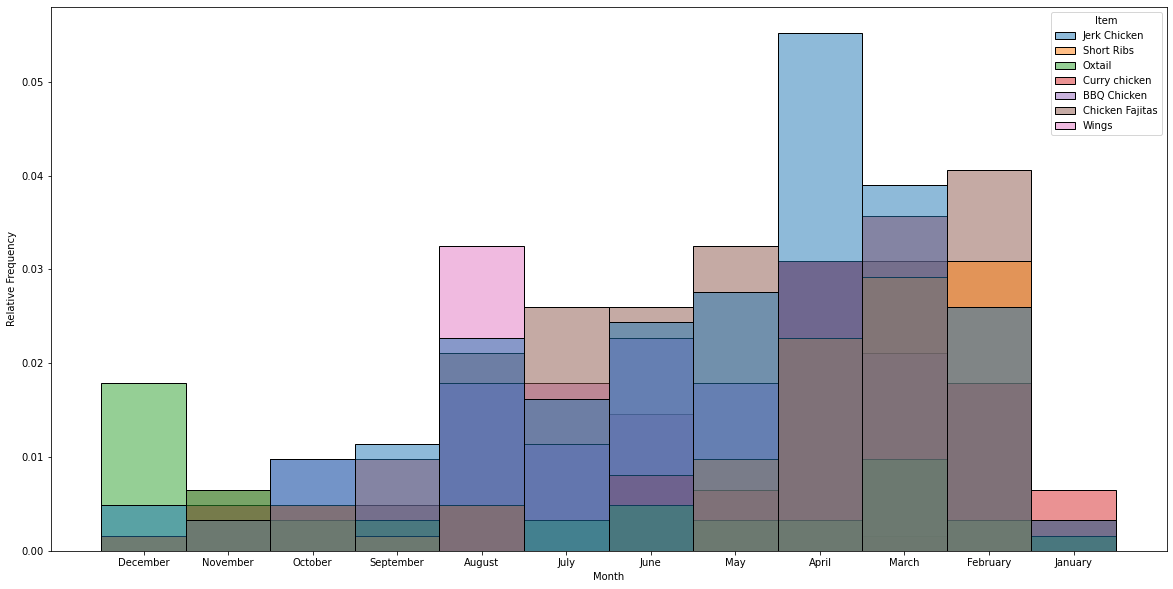

In [129]:
fig_size = (20,10)
fig,ax = plt.subplots(figsize=fig_size)
sns.color_palette("Set1")
plot = sns.histplot(x="month",hue="Item",data=subset,ax=ax,stat="probability",)
plot.set(ylabel="Relative Frequency",xlabel="Month")

In [130]:
subset.to_excel("./ss.xlsx")

In [131]:
df.columns

Index(['Date', 'Time', 'Time Zone', 'Category', 'Item', 'Qty',
       'Price Point Name', 'SKU', 'Modifiers Applied', 'Gross Sales',
       'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Payment ID',
       'Device Name', 'Notes', 'Event Type', 'Location', 'Dining Option',
       'Customer ID', 'Customer Reference ID', 'Unit', 'Count', 'day_of_week',
       'month', 'month_index'],
      dtype='object')

In [132]:
a_Rules = df.groupby("Transaction ID")["Item"].apply(list).reset_index()

In [133]:
a_Rules["n_items"] = a_Rules.Item.apply(len)

In [134]:
a_Rules["Item"] = a_Rules.Item.apply(lambda x:",".join(x))

In [135]:
a_Rules.tail()

,Transaction ID,Item,n_items
1091,ztmAvnVu8ddFYSNUA3rnEWheV,"Jerk Chicken,Curry chicken",2
1092,zvVPd2EXe5t0KmHKY09aXv7eV,Jerk Chicken,1
1093,zvpdNThkyaLHdYrNRA9rIi7eV,Curry chicken,1
1094,zxAYDeNWowtAxoJPUBzG4LpeV,Custom Amount,1
1095,zxenBX8VyDGtV8ZkoXd2XC9eV,"Custom Amount,Jerk Chicken",2


In [136]:
a_Rules.to_csv("./assoc_rule.csv",index=False)

In [137]:
df.head()

,Date,Time,Time Zone,Category,Item,Qty,Price Point Name,SKU,Modifiers Applied,Gross Sales,...,Event Type,Location,Dining Option,Customer ID,Customer Reference ID,Unit,Count,day_of_week,month,month_index
0,2018-12-23,12:48:53,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,21.0,...,Payment,Authentic by Zee,NaN,ET95G97MHS02PYQGZCJWEYVM8W,NaN,ea,1,Sunday,December,12
1,2018-12-22,11:46:37,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,17.5,...,Payment,Authentic by Zee,NaN,9FY2KQCGFX3E7A6SR5D0YPWCSM,NaN,ea,1,Saturday,December,12
2,2018-12-22,11:36:57,Eastern Time (US & Canada),None,Jerk Chicken,1,Regular,NaN,NaN,6.5,...,Payment,Authentic by Zee,NaN,J4X9N1NKMN3CCZA27TV71PP1GM,NaN,ea,1,Saturday,December,12
3,2018-12-22,11:36:57,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,5.0,...,Payment,Authentic by Zee,NaN,J4X9N1NKMN3CCZA27TV71PP1GM,NaN,ea,1,Saturday,December,12
4,2018-12-22,11:36:57,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,3.0,...,Payment,Authentic by Zee,NaN,J4X9N1NKMN3CCZA27TV71PP1GM,NaN,ea,1,Saturday,December,12


In [138]:
df.Date = df.Date.dt.date

In [139]:
ts = df[["Date","Net Sales"]].copy()

In [140]:
ts.columns = ["ds","y"]

In [141]:
ts.y = ts.y.str.replace(r'[^0-9\.]','',regex=True)

In [142]:
ts.y = pd.to_numeric(ts.y)
ts  = ts.groupby(["ds"])["y"].sum().reset_index()

In [143]:
m = Prophet()

In [144]:
m.fit(ts)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [145]:
future = m.make_future_dataframe(periods=365)

In [146]:
forecast = m.predict(future)

In [147]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
613,2021-12-27,193.880701,-82.858682,343.718614,193.880684,193.880718,-68.729360,-68.729360,-68.729360,-61.106894,-61.106894,-61.106894,-7.622466,-7.622466,-7.622466,0.0,0.0,0.0,125.151341
614,2021-12-28,193.967781,-48.439631,364.592706,193.967764,193.967798,-46.985769,-46.985769,-46.985769,-35.174014,-35.174014,-35.174014,-11.811755,-11.811755,-11.811755,0.0,0.0,0.0,146.982012
615,2021-12-29,194.054861,41.092998,440.197913,194.054844,194.054878,43.197521,43.197521,43.197521,59.265844,59.265844,59.265844,-16.068322,-16.068322,-16.068322,0.0,0.0,0.0,237.252382
616,2021-12-30,194.141941,-43.705429,392.884663,194.141924,194.141958,-22.180768,-22.180768,-22.180768,-1.872715,-1.872715,-1.872715,-20.308054,-20.308054,-20.308054,0.0,0.0,0.0,171.961173
617,2021-12-31,194.229021,-35.545286,402.104183,194.229004,194.229038,-8.892747,-8.892747,-8.892747,15.555790,15.555790,15.555790,-24.448537,-24.448537,-24.448537,0.0,0.0,0.0,185.336274


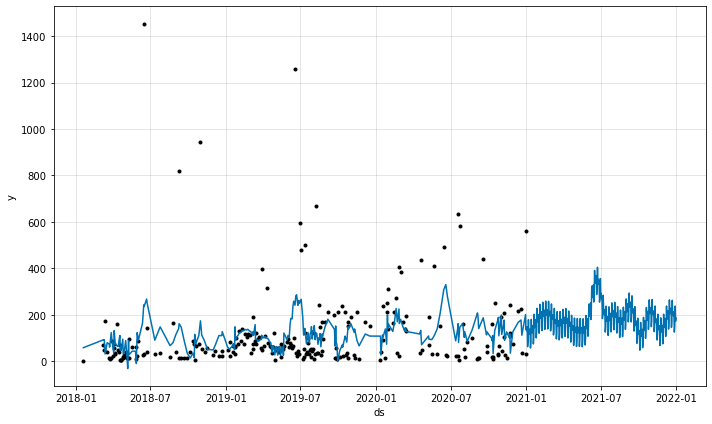

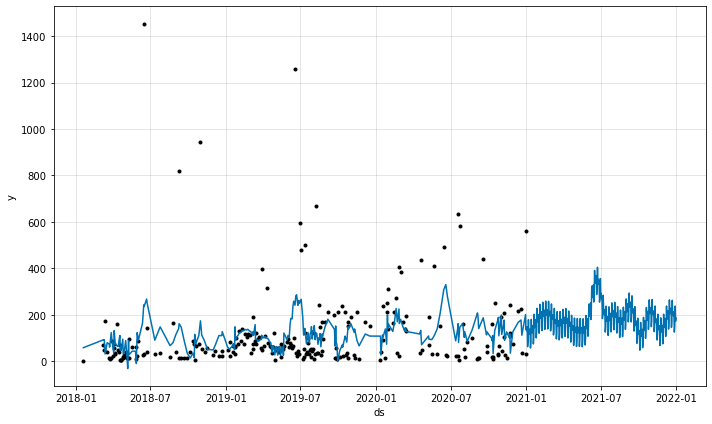

In [148]:
m.plot(forecast,uncertainty=False)

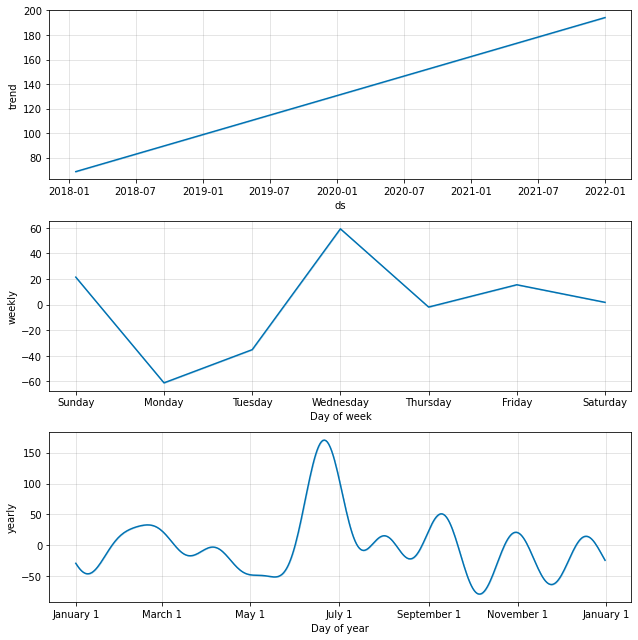

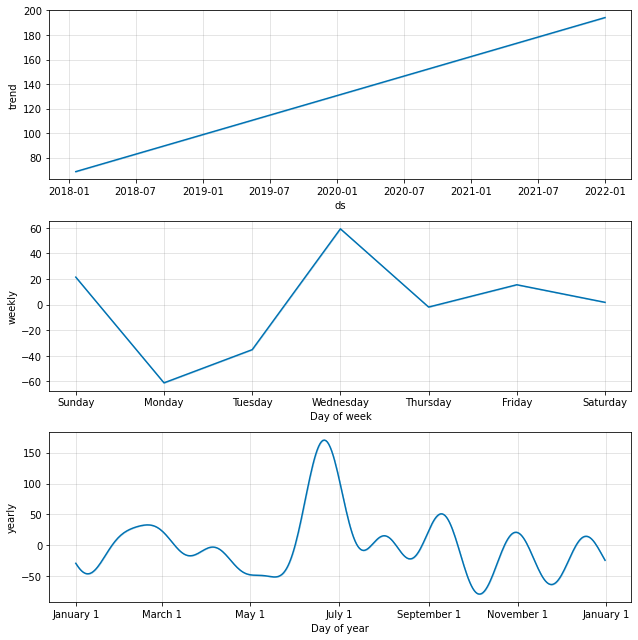

In [149]:
m.plot_components(forecast)

In [150]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='182 days', period='30 days', horizon = '365 days')

INFO:prophet:Making 18 forecasts with cutoffs between 2018-08-09 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/18 [00:00<?, ?it/s]

In [151]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-18,-38847.495444,-39049.237138,-38643.950332,19.00,2018-08-09
1,2018-08-25,-23827.710574,-24036.729556,-23604.317898,165.50,2018-08-09
2,2018-09-01,3683.769134,3493.988938,3874.846147,40.50,2018-08-09
3,2018-09-08,23855.167781,23647.133637,24061.171249,14.00,2018-08-09
4,2018-09-09,24859.699405,24678.428455,25075.136354,820.00,2018-08-09
...,...,...,...,...,...,...
1697,2020-12-12,164.440866,-53.442387,378.120357,218.00,2020-01-01
1698,2020-12-19,147.135870,-50.204918,373.172112,224.00,2020-01-01
1699,2020-12-21,208.213077,-9.270690,423.444244,35.00,2020-01-01
1700,2020-12-30,146.429206,-87.955239,359.075614,560.62,2020-01-01


In [152]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,35 days,2.776275e+07,5269.036860,1552.779075,44.631375,1.342640,1.291319,0.605882
1,36 days,3.092682e+07,5561.188754,1694.953195,55.575437,1.342640,1.299349,0.602353
2,37 days,3.092368e+07,5560.906334,1694.978620,55.418601,1.329748,1.303539,0.602941
3,38 days,3.346710e+07,5785.075544,1849.832306,60.629901,1.342640,1.331939,0.592941
4,39 days,3.401550e+07,5832.281269,1918.715727,69.060046,1.422160,1.348762,0.591176
...,...,...,...,...,...,...,...,...
326,361 days,6.514449e+06,2552.341917,909.447399,33.375653,3.642085,1.453453,0.474118
327,362 days,1.007571e+07,3174.225552,1047.604787,38.044126,3.678120,1.455555,0.469412
328,363 days,1.005789e+07,3171.418095,1042.514864,37.861637,3.642085,1.446336,0.470588
329,364 days,1.536028e+07,3919.218798,1215.974615,37.686899,3.281668,1.453675,0.469412
